In [21]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [5]:
data = pd.read_csv ('../Datasets/winequality-white.csv',
                   names = ['Fixed Acidity',
                            'Volatile Acidity',
                            'Citric Acid',
                            'Residual Sugar',
                            'Chlorides',
                            'Free Sulfur Dioxide',
                            'Total Sulfur Dioxide',
                            'Density',
                            'pH',
                            'Sulphates',
                            'Alcohol',
                            'Quality'
                           ],
                   skiprows = 1, sep = r'\s*;\s*', engine = 'python')

In [6]:
data.head ()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
data['Quality'].unique ()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [11]:
x = data.drop ('Quality', axis = 1)
y = data['Quality']

x = preprocessing.scale (x)

xTrain, xTest, yTrain, yTest = train_test_split (x, y, test_size = 0.2, random_state = 0)

In [14]:
svcCLF = LinearSVC (penalty = 'l1', dual = False, tol = 1e-3)
svcCLF.fit (xTrain, yTrain)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)

In [15]:
accuracy = svcCLF.score (xTest, yTest)
accuracy

0.49183673469387756

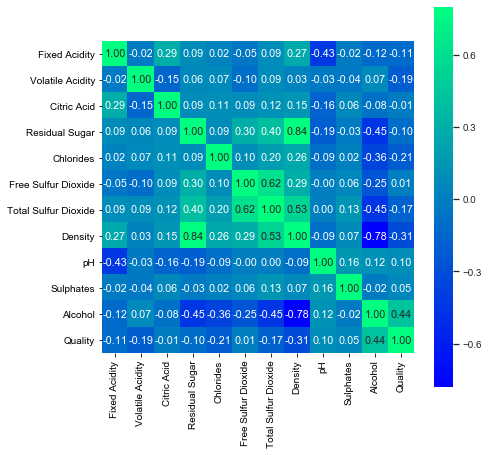

In [19]:
corrmat = data.corr ()
f, ax = plt.subplots (figsize = (7, 7))
sb.set (font_scale = 0.9)
sb.heatmap (corrmat, vmax = 0.8, square = True, annot = True, fmt = '0.2f', cmap = 'winter')
plt.show ()

In [22]:
pca = PCA (n_components = 11, whiten = True)
xReduced = pca.fit_transform (x)

In [24]:
pca.explained_variance_

array([3.2229119 , 1.57556161, 1.22192081, 1.01873034, 0.97353334,
       0.93893321, 0.7267464 , 0.59948087, 0.41422824, 0.28954625,
       0.0206533 ])

In [25]:
pca.explained_variance_ratio_

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014, 0.06605437, 0.05448713, 0.03764942, 0.02631701,
       0.00187719])

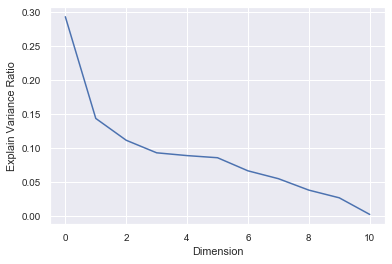

In [27]:
plt.plot (pca.explained_variance_ratio_)
plt.xlabel ('Dimension')
plt.ylabel ('Explain Variance Ratio')
plt.show ()

In [30]:
xTrain, xTest, yTrain, yTest = train_test_split (xReduced, y, test_size = 0.2, random_state = 0)
svcClfPca = LinearSVC (penalty = 'l1', dual = False, tol = 1e-3)
svcClfPca.fit (xTrain, yTrain)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)

In [31]:
accuracy = svcClfPca.score (xTest, yTest)
accuracy

0.49183673469387756

In [32]:
pca = PCA (n_components = 9, whiten = True)
xReduced = pca.fit_transform (x)

In [33]:
pca.explained_variance_

array([3.2229119 , 1.57556161, 1.22192081, 1.01873034, 0.97353334,
       0.93893321, 0.7267464 , 0.59948087, 0.41422824])

In [34]:
pca.explained_variance_ratio_

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014, 0.06605437, 0.05448713, 0.03764942])

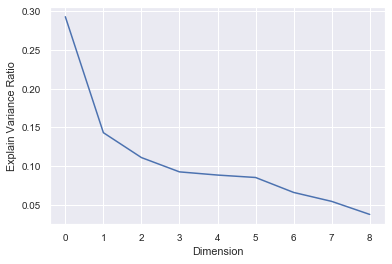

In [35]:
plt.plot (pca.explained_variance_ratio_)
plt.xlabel ('Dimension')
plt.ylabel ('Explain Variance Ratio')
plt.show ()

In [36]:
xTrain, xTest, yTrain, yTest = train_test_split (xReduced, y, test_size = 0.2, random_state = 0)
svcClfPca = LinearSVC (penalty = 'l1', dual = False, tol = 1e-3)
svcClfPca.fit (xTrain, yTrain)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)

In [37]:
accuracy = svcClfPca.score (xTest, yTest)
accuracy

0.49387755102040815